In [3]:
# Cell 1
# model_training.ipynb

import os
import sys

sys.path.append(os.path.abspath('../src'))
from models_svm import train_svm_model
from evaluate import evaluate_model
from data import preprocess_data

# Cell 2 - Define paths
RAW_PATH = '../data/raw/marine_water.xlsm'
PROCESSED_PATH = '../data/processed/water_quality_cleaned.csv'
MODEL_PATH = '../results/reports/svm_model.pkl'
RESULTS_DIR = '../results/'

# Cell 3 - Preprocess (reuse your existing preprocessing code)
from preprocessing import clean_data
preprocess_data(RAW_PATH, PROCESSED_PATH)

# Cell 4 - Train SVM
model, label_encoder, X_test, y_test = train_svm_model(PROCESSED_PATH, MODEL_PATH)

# Cell 5 - Evaluate
evaluate_model(model, label_encoder, X_test, y_test, RESULTS_DIR)


                      precision    recall  f1-score   support

           drinkable       0.96      0.96      0.96       110
good for marine life       0.88      0.88      0.88        40
      non consumable       0.60      0.60      0.60         5

            accuracy                           0.93       155
           macro avg       0.81      0.81      0.81       155
        weighted avg       0.93      0.93      0.93       155



/Users/anshbharti/Documents/SEM-6TH/Minor Project/water_quality_prediction/src/models_svm.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


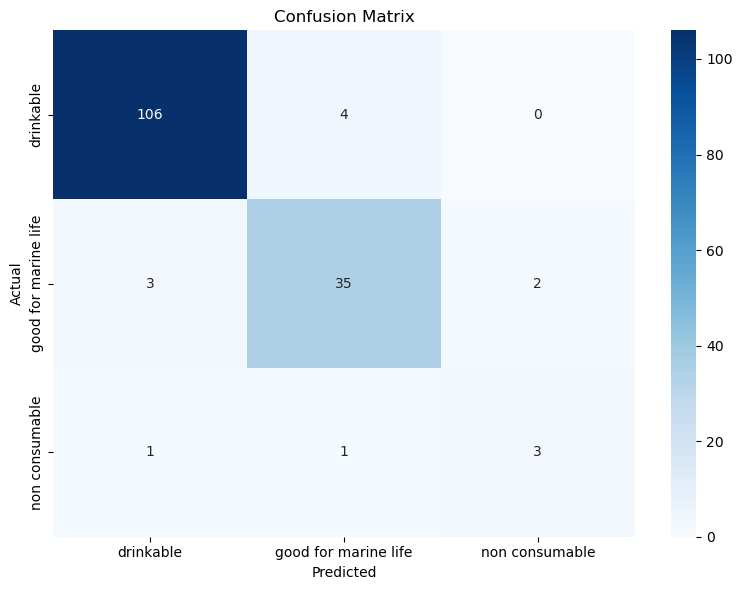

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)

# Convert encoded labels back to original
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
